# An EDA example
## Topic 05 of Section 01 of Intoduction to Exploratory Data Analysis Series
.

Written by: [KV Subbaih Setty](https://www.kvssetty.com).

This series of articles are inspired by: https://doi.org/10.18434/M32189

**This series of articles and tutorials is divided in to following five sections** 

* Section ONE:   EDA Introduction.
* Section TWO:   EDA Assumptions.
* Section Three: EDA techniques.
* Section Four:  EDA case studies.
* Section Five:  EDA Python libraries.

And each section is further sub divided in to number of topics and each topic is covered in a single separate tutorial. 


**Table of topics of sectionONE**:
1. [What is EDA?](https://medium.com/nerd-for-tech/what-is-eda-ec2791f48de9)
2. [Types of Data Analysis](https://medium.com/nerd-for-tech/approaches-to-data-analysis-91f2b7a9aac0)
3. [EDA Goals](https://medium.com/nerd-for-tech/goals-of-eda-42a4da883850)
4. [The Role of Graphics in EDA](https://medium.com/nerd-for-tech/role-of-graphics-in-eda-38578f623c73)
5. **An EDA Example** (This Article)
6. General EDA Problem Categories

Each topic is covered in a separate article/notebook.
This article is topic5:An EDA Example in EDA of Section ONE: EDA itroduction.



## Topic 05: An EDA Example

In the previous article we said that there are two techniques or procedures for data analysis, namely 
- **Quantitative techniques**
- **Graphical techniques**

In this tutrorial we will use both the methods on four different datasets and prove that quantative techniques are misleading some times and  garphical technique (EDA) is the the way to go.
But in reality most practical analysis involve both the methods.For more details on these techniques see the [previous article](https://medium.com/nerd-for-tech/role-of-graphics-in-eda-38578f623c73) of the EDA series

**Anscombe Example**: A simple, classic dataset (Anscombe’s quartet) is used to illustrate central role that graphics play in terms of providing insight into a dataset. 

According to the definition given in [**Wikipedia**,](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) Anscombe’s quartet comprises four datasets that have nearly identical simple statistical properties, yet appear very different when graphed. Each dataset consists of eleven (x,y) data points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before modeling it and the effect of outliers on statistical properties.

First, let us import the Anscombe's quartet  dataset using pandas and separate the quartet in to four datasets.

In [1]:
import pandas as pd
anscombe_df = pd.read_csv("../../datasets/anscombe.csv") 

In [2]:
anscombe_df

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


In [3]:
# separate in to four datasets
df1 = anscombe_df[['x1', 'y1']]
df2 = anscombe_df[['x2', 'y2']]
df3 = anscombe_df[['x3', 'y3']]
df4 = anscombe_df[['x4', 'y4']]

In [4]:
# look at df1
df1

,x1,y1
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.82


### Summary Statistics of dataset df1
If the goal of the analysis is to compute quantitative statistics plus determine the best linear fit for`y1` as a function of `x1`, the results might be given as (see the annexture at the end):
- N = 11
- Mean of X = 9.0
- Mean of Y = 7.5
- Intercept = 3
- Slope = 0.5
- Residual standard deviation = 1.237
- Correlation = 0.816

The above quantitative analysis, although valuable, gives us only limited insight into the data.

### Scatter Plot of dataset df1
In contrast, the following simple scatter plot of the data

suggests the following:

1. The data set "behaves like" a linear curve with some scatter;
2. There is no justification for a more complicated model (e.g., quadratic);
3. There are no outliers;
4. The vertical spread of the data appears to be of equal height irrespective of the X. value; this indicates that the data are equally-precise throughout and so a "regular" (that is, equi-weighted) fit is appropriate.

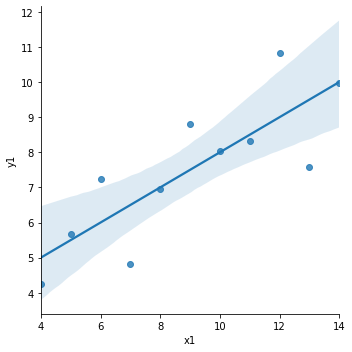

In [5]:
import seaborn as sns

g = sns.lmplot(data=df1, x="x1", y="y1")
   



This kind of characterization for the data serves as the core for getting insight/feel for the data. Such insight/feel does not come from the quantitative statistics; on the contrary, calculations of quantitative statistics such as intercept and slope should be subsequent to the characterization and will make sense only if the characterization is true. 

### Three Additional Data Sets

To illustrate the loss of information that results when the graphics insight step is skipped, consider the following three data sets

In [6]:
print (pd.concat([df2.reset_index(drop=1),df3.reset_index(drop=1),df4.reset_index(drop=1)], axis=1))

    x2    y2  x3     y3  x4     y4
0   10  9.14  10   7.46   8   6.58
1    8  8.14   8   6.77   8   5.76
2   13  8.74  13  12.74   8   7.71
3    9  8.77   9   7.11   8   8.84
4   11  9.26  11   7.81   8   8.47
5   14  8.10  14   8.84   8   7.04
6    6  6.13   6   6.08   8   5.25
7    4  3.10   4   5.39  19  12.50
8   12  9.13  12   8.15   8   5.56
9    7  7.26   7   6.42   8   7.91
10   5  4.74   5   5.73   8   6.89


#### Quantitative Statistics for Data Set 2
A quantitative analysis on data set 2 yields:
- N = 11
- Mean of X = 9.0
- Mean of Y = 7.5
- Intercept = 3
- Slope = 0.5
- Residual standard deviation = 1.237
- Correlation = 0.816

which is identical to the analysis for data set 1. One might naively assume that the two data sets are "equivalent" since that is what the statistics tell us; but what do the statistics not tell us?

#### Quantitative Statistics for Data Sets 3 and 4
Remarkably, a quantitative analysis on data sets 3 and 4 also yields:
- N = 11
- Mean of X = 9.0
- Mean of Y = 7.5
- Intercept = 3
- Slope = 0.5
- Residual standard deviation = 1.236
- Correlation = 0.816 (0.817 for data set 4)

which implies that in some quantitative sense, all four of the data sets are **equivalent**. In fact, the four data sets are **far from equivalent** and a scatter plot of each data set, which would be step 1 of any EDA approach, would tell us that immediately.

#### The scatter plots of anscombe dataset:

In [7]:
import seaborn as sns
sns.set_style()

# Load the example dataset for Anscombe's quartet, 
df = sns.load_dataset("anscombe")

**Note:** the seaborn has a built in anscombe dataset, which is saved slightly diffrently compared to what we imported earlier as shown below:

In [8]:
df


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


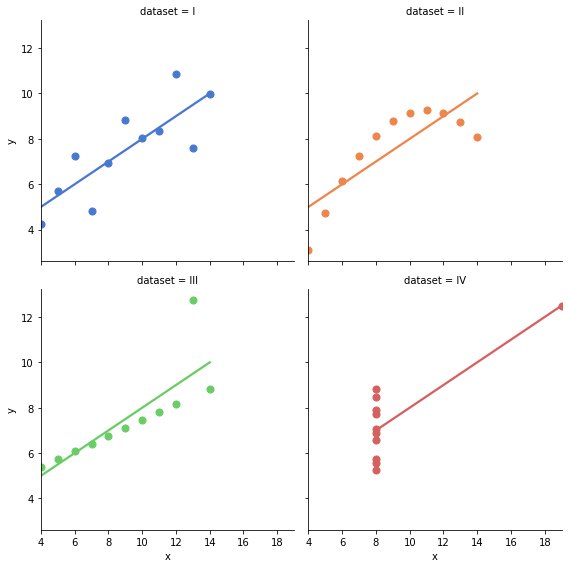

In [9]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

#### Interpretation of Scatter Plots
Conclusions from the scatter plots are:
- data set 1 is clearly linear with some scatter.
- data set 2 is clearly quadratic.
- data set 3 clearly has an outlier.
- data set 4 is obviously the victim of a poor experimental design with a single point far removed from the bulk of the data "wagging the dog".

#### Importance of Exploratory Analysis

The above bullet points are exactly the substance that provide and define "insight" and "feel" for a data set. They are the goals and the fruits of an open exploratory data analysis (EDA) approach to the data. Quantitative statistics are not wrong per se, but they are incomplete. They are incomplete because they are **numeric summaries** which in the summarization operation do a good job of focusing on a particular aspect of the data (e.g., mean, intercept, slope, degree of relatedness, etc.) by judiciously reducing the data to a few numbers. Doing so also **filters** the data, necessarily omitting and screening out other sometimes crucial information in the focusing operation. Quantitative statistics focus but also filter; and filtering is exactly what makes the quantitative approach incomplete at best and misleading at worst.

The estimated intercepts (= 3) and slopes (= 0.5) for data sets 2, 3, and 4 are totally misleading because the estimation is done in the context of an **assumed linear model and that linearity assumption is the fatal flaw in this analysis.**

The EDA approach of deliberately postponing the model selection until further along in the analysis (see the illustarions below) has many rewards, not the least of which is the ultimate convergence to a much-improved model and the formulation of valid and supportable scientific and engineering conclusions.

For **Classical Analysis**,which mainly uses **quantiative** technique the sequence is:

![classical Analysis image](img01.png)

For **EDA**, which mainly uses **graphic** technique the sequence is:

![EDA Analysis image](img02.png)

### Conclusions

The moral of the story is, use EDA work flow to make your life easier and freely mix quantitative tecchnique as you need in case.

# Annexture:

You might be thinking how to got those **Quantitative Statistics** for Dataset 1,2,3, and 4 in the above analysis. I mean the following results:
- N = 11
- Mean of X = 9.0
- Mean of Y = 7.5
- Intercept = 3
- Slope = 0.5
- Residual standard deviation = 1.237
- Correlation = 0.816

Here is my procedure for dataset01 (df1) you can repeat the same for other datasets. But I feel there might be more simple and straight forward methods  which I am not aware of at the moment.

In [10]:
df1.describe()

,x1,y1
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


from above we get:
- **N = 11**
- **Mean of x1 = 9.0**
- **Mean of x2 = 7.5**

In [11]:
df1.corr( method='pearson')

,x1,y1
x1,1.000000,0.816421
y1,0.816421,1.000000


**Correlation = .816**

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = df1.x1

X_train = X_train.values

X_train = X_train.reshape(11, 1)
print("xtain-shape=", X_train.shape)

y_train = df1.y1

y_train = y_train.values

y_train = y_train.reshape(11, 1)
print('ytrain-shape=', y_train.shape)

lr = LinearRegression()
lrt = lr.fit(X_train, y_train)

print("Slope= {}".format(lrt.coef_))
print("Intercept={}".format(lrt.intercept_))



# Make predictions using the testing set
y_pred = lrt.predict(y_train)

print("Standatd deviation of MSE: %.2f" % np.sqrt(mean_squared_error(y_train, y_pred)))

xtain-shape= (11, 1)
ytrain-shape= (11, 1)
Slope= [[0.50009091]]
Intercept=[3.00009091]
Standatd deviation of MSE: 1.22


Note: the small difference in Standard deviation value is due to use of a slightly different formula.